In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### 数据预处理

D:\Users\songz\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


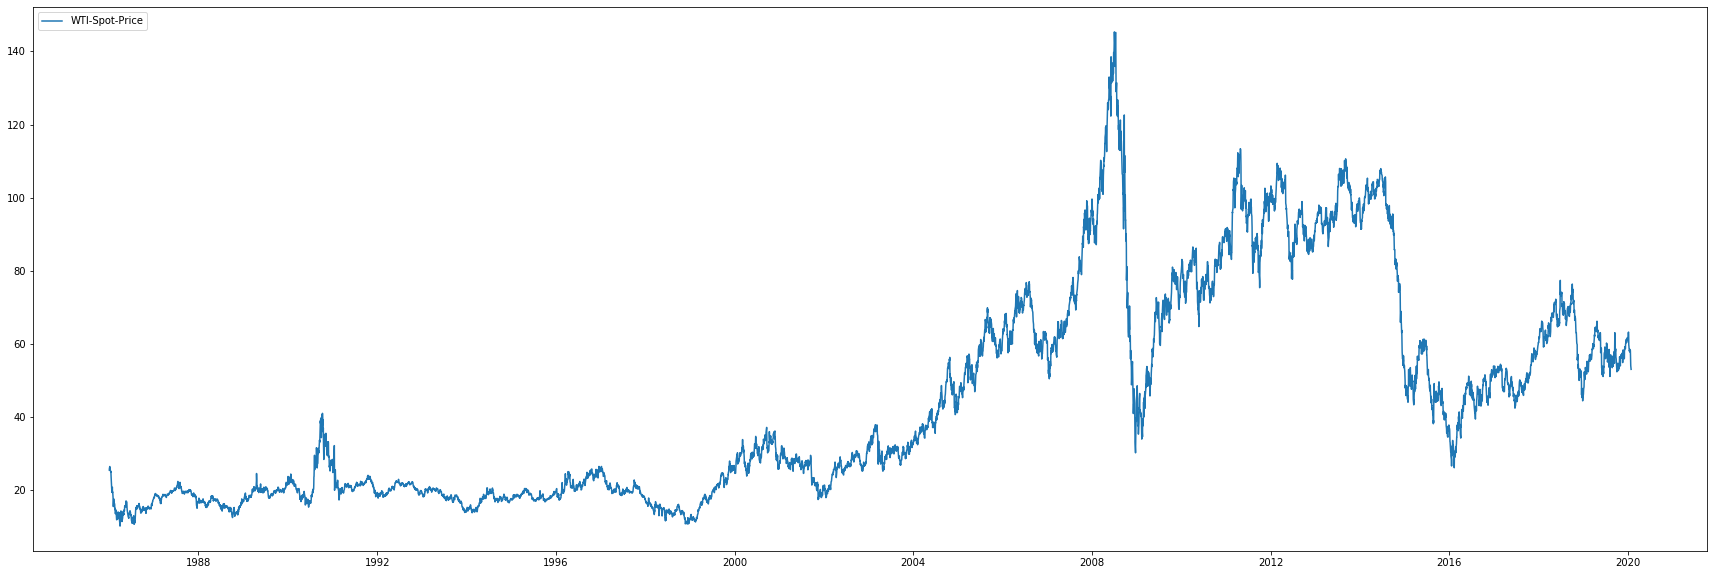

In [2]:
data=pd.read_excel(r'F:/研究生阶段/毕业设计/RWTCd.xls',sheet_name='s')
data1=data[['Date','WTI-Spot-Price']].set_index('Date')
plt.figure(figsize=(30,10))
plt.plot(data1.index,data1,label='WTI-Spot-Price')
plt.legend(loc='upper left')

In [3]:
x_train=data1['1986-1-2':'2008-3-31'].values
x_test=data1['2008-4-1':'2013-10-21'].values
min_max_scaler=MinMaxScaler()
x_train_scale=min_max_scaler.fit_transform(x_train)
x_test_scale=min_max_scaler.transform(data1['2008-4-1':'2013-10-21'])
print(x_train_scale)
print(x_test_scale)

[[0.15316126]
 [0.15756303]
 [0.16286515]
 ...
 [0.9734894 ]
 [0.95378151]
 [0.91326531]]
[[0.90706283]
 [0.94617847]
 [0.93707483]
 ...
 [0.90506202]
 [0.90656263]
 [0.89065626]]


In [9]:
def build_timeseries(data,y_index,TIME_STEPS,LEADING_DAYS):
    dim_0=data.shape[0]-TIME_STEPS-LEADING_DAYS
    dim_1=data.shape[1]#特征个数
    x=np.zeros((dim_0,TIME_STEPS))
    y=np.zeros((dim_0,))
    
    for i in range(0,dim_0):
        x[i]=data[i:TIME_STEPS+i]
        y[i]=data[TIME_STEPS+LEADING_DAYS+i]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [65]:
from sklearn.svm import SVR
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib
parameters = {'kernel':['rbf'], 
              'gamma':np.linspace(0.01,0.1,50),
              'C':np.linspace(20,100,50)}
x_train,y_train=build_timeseries(x_train_scale,0,1,0)
x_test,y_test=build_timeseries(x_test_scale,0,1,0)
svr = svm.SVR()
grid_search = GridSearchCV(svr, parameters, cv=10, n_jobs=-1,scoring="neg_root_mean_squared_error")#SVR模型训练
grid_search.fit(x_train,y_train)#输出最终的参数

print(grid_search.best_params_) 
print(grid_search.score) 
# print(grid_search.cv_results_)
param_C=grid_search.cv_results_['param_C']
param_gama=grid_search.cv_results_['param_gamma']
mean_score=grid_search.cv_results_['std_test_score']

# plt.figure(figsize=(12,12))
# plt.plot(param_C,mean_score)
y_hat = grid_search.predict(x_test)
invert_pred=min_max_scaler.inverse_transform(y_hat.reshape(-1,1))
original=min_max_scaler.inverse_transform(y_test.reshape(-1,1))
error = mean_squared_error(original, invert_pred)**0.5
print("RMSE", error)


'''
简单网格搜索
'''
# best_error=100
# score_C ={'0.001':[],'0.01':[],'0.1':[],'1':[],'10':[],'100':[]}
# score_gamma={'0.001':[],'0.01':[],'0.1':[],'1':[],'10':[],'100':[]}
# for gamma in [0.001,0.01,0.1,1,10,100]:
#     for C in [0.001,0.01,0.1,1,10,100]:
#         for epsilon in [0.001,0.01,0.1,1,10,100]:
#             svr = SVR(kernel='rbf',gamma=gamma,C=C,epsilon=epsilon)#对于每种参数可能的组合，进行一次训练；
#             svr.fit(x_train,y_train)
#             y_hat = svr.predict(x_test)
#             invert_pred=min_max_scaler.inverse_transform(y_hat.reshape(-1,1))
#             original=min_max_scaler.inverse_transform(y_test.reshape(-1,1))
#             error = mean_squared_error(original, invert_pred)**0.5
#             score_C[str(C)].append(error)
#             score_gamma[str(gamma)].append(error)
#             if error < best_error:#找到表现最好的参数
#                 best_error = error
#                 best_parameters = {'kernel':'rbf','gamma':gamma,'C':C,'epsilon':epsilon}


length of time-series i/o (5611, 1) (5611,)
length of time-series i/o (1402, 1) (1402,)
{'C': 88.57142857142857, 'gamma': 0.015510204081632653, 'kernel': 'rbf'}
<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 20.        ,  21.63265306,  23.26530612,  24.89795918,
        26.53061224,  28.16326531,  29.79591837,  31.42857143,
        33.06122449,  34.69387755,  36.32653...
       0.05591837, 0.0577551 , 0.05959184, 0.06142857, 0.06326531,
       0.06510204, 0.06693878, 0.06877551, 0.07061224, 0.07244898,
       0.07428571, 0.07612245, 0.07795918, 0.07979592, 0.08163265,
       0.08346939, 0.08530612, 0.08714286, 0.08897959, 0.09081633,
  

'\n简单网格搜索\n'

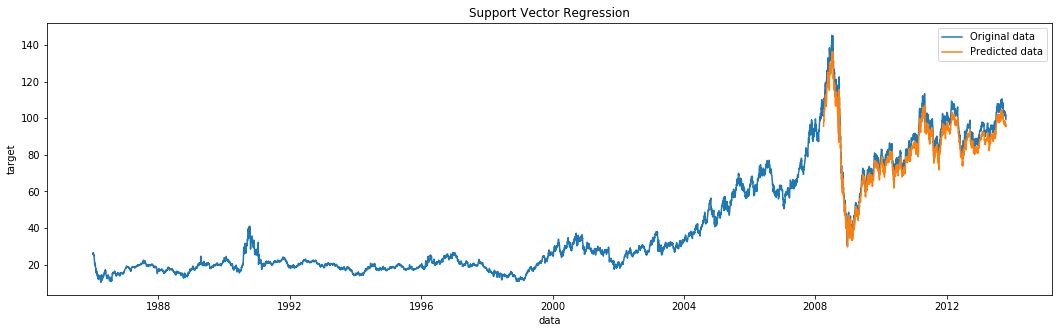

In [66]:

# import pandas as pd 
# score_C=pd.DataFrame(score_C)
# score_gamma=pd.DataFrame(score_gamma)
# score_C.mean().plot()
# score_gamma.mean().plot()
# # plt.figure(figsize=(12,12))
# # plt.plot(param_C.keys,mean_score)


import matplotlib.pyplot as plt 
plt.figure(figsize=(18,5))
plt.plot(data1['1986-1-2':'2013-10-21'].index,data1['1986-1-2':'2013-10-21'], label = 'Original data')
plt.plot(data1['2008-4-2':'2013-10-21'].index,invert_pred, label = 'Predicted data')
# plt.plot(original,label='data')
# plt.plot(y_hat,label='svr model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


In [53]:
np.logspace(-5, 0, num=6, base=2.0)

array([0.03125, 0.0625 , 0.125  , 0.25   , 0.5    , 1.     ])

In [58]:
np.logspace(-5, 5, num=11, base=2.0)

array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01])

In [60]:
np.arange(0.01,0.1)

array([0.01])